### Read the input image

In [1]:
# import the needed libraries
import tensorflow as tf
import tensorflow.contrib.tensorrt as trt # must import this although we will not use it explicitly
from tensorflow.python.platform import gfile
from PIL import Image
import numpy as np
import time
from matplotlib import pyplot as plt

# read the testing images (only for example)
img1= Image.open("dataset/mnist/testing/0/img_108.jpg")
img2= Image.open("dataset/mnist/testing/1/img_0.jpg")
img1 = np.asarray(img1)
img2 = np.asarray(img2)
input_img = np.concatenate((img1.reshape((1, 28, 28, 1)), 
                            img2.reshape((1, 28, 28, 1))), 
                           axis=0)

### Function to read ".pb" model (TensorRT model is stored in ".pb")

In [2]:
# function to read a ".pb" model 
# (can be used to read frozen model or TensorRT model)
def read_pb_graph(model):
  with gfile.FastGFile(model,'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
  return graph_def

### Perform inference using TensorRT model

In [3]:
# variable
TENSORRT_MODEL_PATH = './model/TensorRT_model.pb'

graph = tf.Graph()
with graph.as_default():
    with tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.50))) as sess:
        # read TensorRT model
        trt_graph = read_pb_graph(TENSORRT_MODEL_PATH)

        # obtain the corresponding input-output tensor
        tf.import_graph_def(trt_graph, name='')
        input = sess.graph.get_tensor_by_name('input_tensor_input:0')
        output = sess.graph.get_tensor_by_name('output_tensor/Softmax:0')

        # in this case, it demonstrates to perform inference for 50 times
        total_time = 0; n_time_inference = 50
        out_pred = sess.run(output, feed_dict={input: input_img})
        for i in range(n_time_inference):
            t1 = time.time()
            out_pred = sess.run(output, feed_dict={input: input_img})
            t2 = time.time()
            delta_time = t2 - t1
            total_time += delta_time
            print("needed time in inference-" + str(i) + ": ", delta_time)
        avg_time_tensorRT = total_time / n_time_inference
        print("average inference time: ", avg_time_tensorRT)

Instructions for updating:
Use tf.gfile.GFile.
needed time in inference-0:  0.000782012939453125
needed time in inference-1:  0.0006928443908691406
needed time in inference-2:  0.0006496906280517578
needed time in inference-3:  0.0006840229034423828
needed time in inference-4:  0.0006887912750244141
needed time in inference-5:  0.0005681514739990234
needed time in inference-6:  0.0005831718444824219
needed time in inference-7:  0.0005865097045898438
needed time in inference-8:  0.0007417201995849609
needed time in inference-9:  0.0006723403930664062
needed time in inference-10:  0.0006170272827148438
needed time in inference-11:  0.0006124973297119141
needed time in inference-12:  0.0005292892456054688
needed time in inference-13:  0.0005846023559570312
needed time in inference-14:  0.0006611347198486328
needed time in inference-15:  0.0005919933319091797
needed time in inference-16:  0.000553131103515625
needed time in inference-17:  0.0005233287811279297
needed time in inference-18: 

### Perform inference using the original tensorflow model

In [4]:
# variable
FROZEN_MODEL_PATH = './model/frozen_model.pb'

graph = tf.Graph()
with graph.as_default():
    with tf.Session() as sess:
        # read TensorRT model
        frozen_graph = read_pb_graph(FROZEN_MODEL_PATH)

        # obtain the corresponding input-output tensor
        tf.import_graph_def(frozen_graph, name='')
        input = sess.graph.get_tensor_by_name('input_tensor_input:0')
        output = sess.graph.get_tensor_by_name('output_tensor/Softmax:0')

        # in this case, it demonstrates to perform inference for 50 times
        total_time = 0; n_time_inference = 50
        out_pred = sess.run(output, feed_dict={input: input_img})
        for i in range(n_time_inference):
            t1 = time.time()
            out_pred = sess.run(output, feed_dict={input: input_img})
            t2 = time.time()
            delta_time = t2 - t1
            total_time += delta_time
            print("needed time in inference-" + str(i) + ": ", delta_time)
        avg_time_original_model = total_time / n_time_inference
        print("average inference time: ", avg_time_original_model)
        print("TensorRT improvement compared to the original model:", avg_time_original_model/avg_time_tensorRT)

needed time in inference-0:  0.0009000301361083984
needed time in inference-1:  0.0009007453918457031
needed time in inference-2:  0.0008113384246826172
needed time in inference-3:  0.0006928443908691406
needed time in inference-4:  0.0007717609405517578
needed time in inference-5:  0.0007328987121582031
needed time in inference-6:  0.0006477832794189453
needed time in inference-7:  0.0007433891296386719
needed time in inference-8:  0.0008635520935058594
needed time in inference-9:  0.0007891654968261719
needed time in inference-10:  0.0014221668243408203
needed time in inference-11:  0.0006916522979736328
needed time in inference-12:  0.0006837844848632812
needed time in inference-13:  0.0006885528564453125
needed time in inference-14:  0.0006639957427978516
needed time in inference-15:  0.0006635189056396484
needed time in inference-16:  0.0007214546203613281
needed time in inference-17:  0.0007011890411376953
needed time in inference-18:  0.0007994174957275391
needed time in inferen

### Plot the prediction result

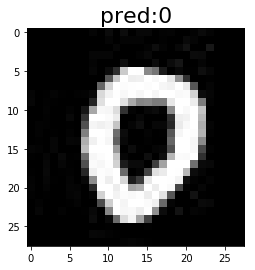

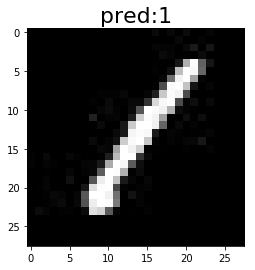

In [5]:
# plot the prediction output
plt.figure('img 1')
plt.imshow(img1, cmap='gray')
plt.title('pred:' + str(np.argmax(out_pred[0])), fontsize=22)

plt.figure('img 2')
plt.imshow(img2, cmap='gray')
plt.title('pred:' + str(np.argmax(out_pred[1])), fontsize=22)
plt.show()